In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
training = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

training['train_test'] = 1
test['train_test'] = 0
test['Survived'] = np.NaN
all_data = pd.concat([training,test])

%matplotlib inline

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  import sys


## Data exploration


### 1) For numerical data 
* Histogram 
* Correlation plot
* Pivot table  

### 2) For categorical Data 
* Bar chart
* Pivot table 


In [4]:
training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
train_test     891 non-null int64
dtypes: float64(2), int64(6), object(5)
memory usage: 90.6+ KB


In [5]:
training.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,train_test
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.0
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,1.0
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429,0.0
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,1.0
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400,1.0
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,1.0
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000,1.0
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.0


In [6]:
# create numeric dataframe and categorical dataframe
df_num = training[['Age','SibSp','Parch','Fare']]
df_cat = training[['Survived','Pclass','Sex','Ticket','Cabin','Embarked']]

//anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
//anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


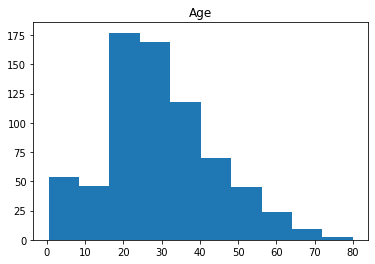

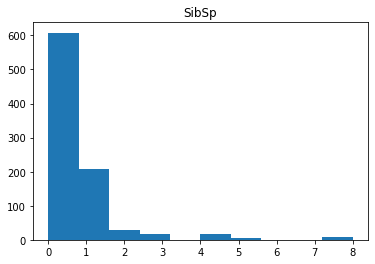

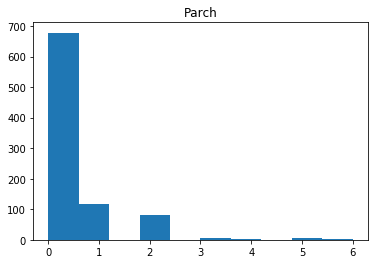

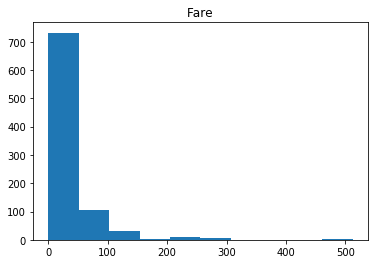

In [7]:
#distributions for all numerical feature
for i in df_num.columns:
    plt.hist(df_num[i])
    plt.title(i)
    plt.show()

In [8]:
# compare survival rate across numerical features(mean)
pd.pivot_table(training, index = 'Survived', values = ['Age','SibSp','Parch','Fare'])

,Age,Fare,Parch,SibSp
Survived,,,,
0,30.626179,22.117887,0.329690,0.553734
1,28.343690,48.395408,0.464912,0.473684


            Age     SibSp     Parch      Fare
Age    1.000000 -0.308247 -0.189119  0.096067
SibSp -0.308247  1.000000  0.414838  0.159651
Parch -0.189119  0.414838  1.000000  0.216225
Fare   0.096067  0.159651  0.216225  1.000000


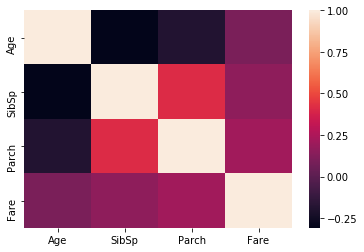

In [9]:
print(df_num.corr())
sns.heatmap(df_num.corr())

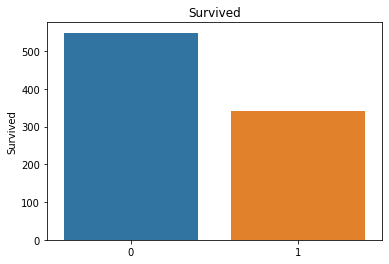

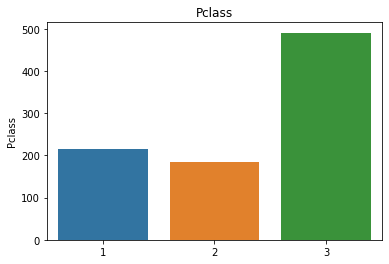

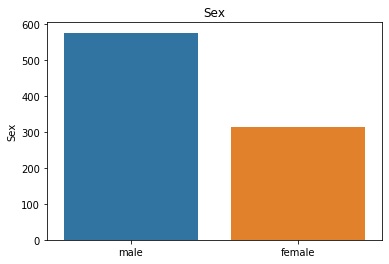

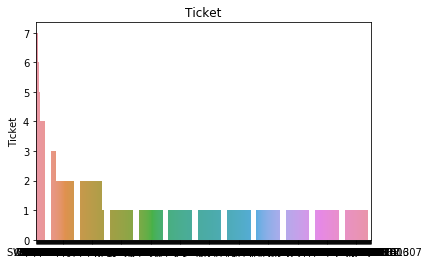

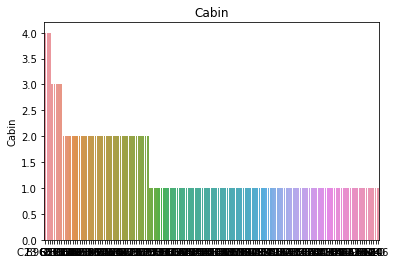

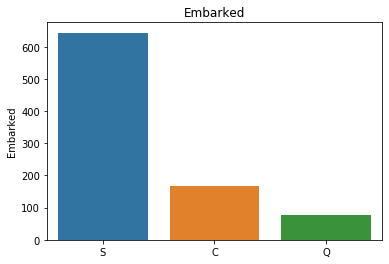

In [10]:
for i in df_cat.columns:
    sns.barplot(df_cat[i].value_counts().index,df_cat[i].value_counts()).set_title(i)
    plt.show()

We need some feature engineering on Ticket and Cabin

In [12]:
# Comparing survival and each of these categorical variables 
print(pd.pivot_table(training, index = 'Survived', columns = 'Pclass', values = 'Ticket' ,aggfunc ='count'))
print()
print(pd.pivot_table(training, index = 'Survived', columns = 'Sex', values = 'Ticket' ,aggfunc ='count'))
print()
print(pd.pivot_table(training, index = 'Survived', columns = 'Embarked', values = 'Ticket' ,aggfunc ='count'))

Pclass      1   2    3
Survived              
0          80  97  372
1         136  87  119

Sex       female  male
Survived              
0             81   468
1            233   109

Embarked   C   Q    S
Survived             
0         75  47  427
1         93  30  217


## Feature Engineering 
### 1) num_of_cabin: number of cabins of each passenger

### 2) Tickets - Do different ticket types impact survival rates?

### 3) Does a person's name relate to survival rates? 

In [14]:
def num_of_cabin(cabin):
    try:
        return len(cabin.split(' '))
    except:
        return 0
training['Number_Of_Cabin'] = training['Cabin'].apply(num_of_cabin)
training['Number_Of_Cabin'].value_counts()

0    687
1    180
2     16
3      6
4      2
Name: Number_Of_Cabin, dtype: int64

In [15]:
pd.crosstab(training['Survived'], training['Number_Of_Cabin'])

Number_Of_Cabin,0,1,2,3,4
Survived,,,,,
0,481,58,7,3,0
1,206,122,9,3,2


In [17]:
#create new feature which is the first letter of cabin, letter 'n' stands for null
training['Cabin_Letter'] = training.Cabin.apply(lambda x: str(x)[0])

In [18]:
#comparing surivial rate by cabin
print(training.Cabin_Letter.value_counts())
pd.crosstab(training['Survived'], training['Cabin_Letter'], margins = True)

n    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: Cabin_Letter, dtype: int64


Cabin_Letter,A,B,C,D,E,F,G,T,n,All
Survived,,,,,,,,,,
0,8,12,24,8,8,5,2,1,481,549
1,7,35,35,25,24,8,2,0,206,342
All,15,47,59,33,32,13,4,1,687,891


In [19]:
# different types of ticket and survival rate
training['Numeric_Ticket'] = training.Ticket.apply(lambda x: 1 if x.isnumeric() else 0)
pd.crosstab(training['Survived'], training['Numeric_Ticket'])

Numeric_Ticket,0,1
Survived,,
0,142,407
1,88,254


In [20]:
# new feature 'name_title'
training['name_title'] = training.Name.apply(lambda x: x.split(',')[1].split('.')[0].strip())
training['name_title'].value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Major             2
Col               2
Ms                1
Capt              1
Jonkheer          1
the Countess      1
Don               1
Mme               1
Sir               1
Lady              1
Name: name_title, dtype: int64

## Data Preprocessing
### 1) Drop null values from Embarked (only 2) 

### 2) Include only relevant features: 'Pclass', 'Sex','Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'Number_Of_Cabin', 'Cabin_Letter', 'Numeric_Ticket', 'Name_Title'

### 3) Do categorical transforms on all data.
### 4) Impute data with median for fare and age 
### 5) Normalized fare using logarithm for a better normal distribution shape

### 6) Scaled data 0-1 with standard scaler 

In [23]:
#create all new categorical features for both training and test sets 
all_data['Number_Of_Cabin'] = all_data.Cabin.apply(lambda x: 0 if pd.isna(x) else len(x.split(' ')))
all_data['Cabin_Letter'] = all_data.Cabin.apply(lambda x: str(x)[0])
all_data['Numeric_Ticket'] = all_data.Ticket.apply(lambda x: 1 if x.isnumeric() else 0)
all_data['Ticket_Letter'] = all_data.Ticket.apply(lambda x: ''.join(x.split(' ')[:-1]).replace('.','').replace('/','').lower() if len(x.split(' ')[:-1]) >0 else 0)
all_data['Name_Title'] = all_data.Name.apply(lambda x: x.split(',')[1].split('.')[0].strip())

#impute nulls for continuous data 
all_data.Age = all_data.Age.fillna(training.Age.median())
all_data.Fare = all_data.Fare.fillna(training.Fare.median())

#drop null 'embarked' rows. Only 2 instances of this in training and 0 in test 
all_data.dropna(subset=['Embarked'],inplace = True)

# log norm of fare
all_data['Norm_Fare'] = np.log(all_data.Fare+1)

# converted fare to category for pd.get_dummies()
all_data.Pclass = all_data.Pclass.astype(str)

#created dummy variables from categories
all_dummies = pd.get_dummies(all_data[['Pclass','Sex','Age','SibSp','Parch','Norm_Fare','Embarked','Cabin_Letter','Number_Of_Cabin','Numeric_Ticket','Name_Title','train_test']])

#Split to train test again
X_train = all_dummies[all_dummies.train_test == 1].drop(['train_test'], axis =1)
X_test = all_dummies[all_dummies.train_test == 0].drop(['train_test'], axis =1)


y_train = all_data[all_data.train_test==1].Survived


In [24]:
# Scale data 
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
all_dummies_scaled = all_dummies.copy()
all_dummies_scaled[['Age','SibSp','Parch','Norm_Fare']]= scale.fit_transform(all_dummies_scaled[['Age','SibSp','Parch','Norm_Fare']])
all_dummies_scaled

X_train_scaled = all_dummies_scaled[all_dummies_scaled.train_test == 1].drop(['train_test'], axis =1)
X_test_scaled = all_dummies_scaled[all_dummies_scaled.train_test == 0].drop(['train_test'], axis =1)

y_train = all_data[all_data.train_test==1].Survived

## Model Building (Baseline Validation Performance)
Use 10-fold cross validation to get a baseline performances
- Naive Bayes (73.6%)
- Logistic Regression (82.6%)
- Decision Tree (78.0%)
- K Nearest Neighbor (80.9%)
- Random Forest (82.8%)
- Support Vector Classifier (83.1%)
- **Soft Voting Classifier(83.3%)**

In [26]:
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [28]:
gnb = GaussianNB()
cv = cross_val_score(gnb,X_train_scaled,y_train,cv=10)
print(cv)
print(cv.mean())

[0.65168539 0.6741573  0.6741573  0.75280899 0.84269663 0.7752809
 0.79775281 0.69662921 0.76404494 0.73863636]
0.736784984678243


In [29]:
lr = LogisticRegression()
cv = cross_val_score(lr,X_train,y_train,cv=10)
print(cv)
print(cv.mean())

[0.80898876 0.84269663 0.76404494 0.86516854 0.82022472 0.7752809
 0.83146067 0.83146067 0.86516854 0.86363636]
0.8268130745658835


//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  

In [30]:
dt = tree.DecisionTreeClassifier(random_state = 1)
cv = cross_val_score(dt,X_train,y_train,cv=10)
print(cv)
print(cv.mean())

[0.73033708 0.82022472 0.71910112 0.79775281 0.82022472 0.75280899
 0.7752809  0.76404494 0.83146067 0.79545455]
0.7806690500510725


In [31]:
knn = KNeighborsClassifier()
cv = cross_val_score(knn,X_train,y_train,cv=10)
print(cv)
print(cv.mean())

[0.73033708 0.82022472 0.7752809  0.80898876 0.85393258 0.76404494
 0.86516854 0.79775281 0.82022472 0.86363636]
0.8099591419816139


In [32]:
rf = RandomForestClassifier(random_state = 1)
cv = cross_val_score(rf,X_train,y_train,cv=10)
print(cv)
print(cv.mean())

//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: T

[0.78651685 0.83146067 0.76404494 0.85393258 0.86516854 0.86516854
 0.78651685 0.76404494 0.88764045 0.875     ]
0.8279494382022472


//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [33]:
svc = SVC(probability = True)
cv = cross_val_score(svc,X_train_scaled,y_train,cv=10)
print(cv)
print(cv.mean())

//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The defa

[0.83146067 0.86516854 0.7752809  0.87640449 0.83146067 0.80898876
 0.80898876 0.78651685 0.87640449 0.85227273]
0.8312946884576098


//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [34]:

from sklearn.ensemble import VotingClassifier
voting_clf = VotingClassifier(estimators = [('lr',lr),('knn',knn),('rf',rf),('svc',svc)], voting = 'soft')
cv = cross_val_score(voting_clf,X_train_scaled,y_train,cv=5)
print(cv)
print(cv.mean())

//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/fores

[0.85393258 0.81460674 0.83146067 0.79775281 0.8700565 ]
0.833561861232781


//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [40]:
voting_clf.fit(X_train_scaled,y_train)
y_hat_base_vc = voting_clf.predict(X_test_scaled).astype(int)
basic_submission = {'PassengerId': test.PassengerId, 'Survived': y_hat_base_vc}
base_submission = pd.DataFrame(data=basic_submission)
base_submission.to_csv('submit1.csv', index=False)

//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


## Model Tuned Performance 
Performances after parameters tunning, using GridSearch and RandomSearch

|Model|Baseline|Tuned Performance|
|-----|--------|-----------------|
|Logistic Regression| 82.6%| 82.6%|
|K Nearest Neighbor| 80.9%|83.2%|
|Random Forest| 82.8%| 83.3|
|Support Vector Classifier| 83.1%| 83.0%|


In [35]:
from sklearn.model_selection import GridSearchCV 
from sklearn.model_selection import RandomizedSearchCV 

In [36]:
def clf_performance(classifier, model_name):
    print(model_name)
    print('Best Score: ' + str(classifier.best_score_))
    print('Best Parameters: ' + str(classifier.best_params_))

In [37]:
lr = LogisticRegression()
param_grid = {'max_iter' : [2000],
              'penalty' : ['l1', 'l2'],
              'C' : np.logspace(-4, 4, 20),
              'solver' : ['liblinear']}

lr_grid = GridSearchCV(lr, param_grid = param_grid, cv = 10, verbose = True, n_jobs = -1)
best_clf_lr = lr_grid.fit(X_train_scaled,y_train)
clf_performance(best_clf_lr,'Logistic Regression')

Fitting 10 folds for each of 40 candidates, totalling 400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 155 tasks      | elapsed:    4.3s


Logistic Regression
Best Score: 0.8267716535433071
Best Parameters: {'C': 0.615848211066026, 'max_iter': 2000, 'penalty': 'l1', 'solver': 'liblinear'}


[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:    8.7s finished


In [38]:
knn = KNeighborsClassifier()
param_grid = {'n_neighbors' : list(range(1,21)),
              'p' : [1,2],
              'metric':['minkowski', 'manhattan', 'euclidean']}
knn_grid = GridSearchCV(knn, param_grid = param_grid, cv = 10, verbose = True, n_jobs = -1)
best_clf_knn = knn_grid.fit(X_train_scaled,y_train)
clf_performance(best_clf_knn,'KNN')

Fitting 10 folds for each of 120 candidates, totalling 1200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 248 tasks      | elapsed:    1.8s


KNN
Best Score: 0.8323959505061868
Best Parameters: {'metric': 'minkowski', 'n_neighbors': 16, 'p': 2}


[Parallel(n_jobs=-1)]: Done 1200 out of 1200 | elapsed:    8.8s finished


In [39]:
svc = SVC(probability = True)
param_grid = {'kernel': ['rbf'], 'gamma': [.1,.5,1,2,5,10],
                                  'C': [.1, 1, 10, 100, 1000]}
svc_grid = GridSearchCV(svc, param_grid = param_grid, cv = 10, verbose = True, n_jobs = -1)
best_clf_svc = svc_grid.fit(X_train_scaled,y_train)
clf_performance(best_clf_svc,'SVC')

Fitting 10 folds for each of 30 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    3.7s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   27.9s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  1.2min finished


SVC
Best Score: 0.8301462317210349
Best Parameters: {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}


In [41]:
rf = RandomForestClassifier(random_state = 1)
param_grid =  {'n_estimators': [100,500,1000], 
                                  'max_depth': [3,5,10,20,50,None],
                                  'max_features': ['auto','sqrt'],
                                  'min_samples_leaf': [1,2,4,10],
                                  'min_samples_split': [2,5,10]}      
rf_grid = RandomizedSearchCV(rf, param_distributions = param_grid, n_iter = 100, cv = 5, verbose = True, n_jobs = -1)
best_clf_rf_rnd = rf_grid.fit(X_train_scaled,y_train)
clf_performance(best_clf_rf_rnd,'Random Forest')

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  8.1min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:  8.6min finished


Random Forest
Best Score: 0.8323959505061868
Best Parameters: {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'auto', 'max_depth': None}


In [43]:
#Soft Voting classifier with the best model from each classifier
best_lr = best_clf_lr.best_estimator_
best_knn = best_clf_knn.best_estimator_
best_svc = best_clf_svc.best_estimator_
best_rf = best_clf_rf_rnd.best_estimator_
voting_clf_soft = VotingClassifier(estimators = [('knn',best_knn),('rf',best_rf),('svc',best_svc)], voting = 'soft') 
voting_clf_all = VotingClassifier(estimators = [('knn',best_knn),('rf',best_rf),('svc',best_svc), ('lr', best_lr)], voting = 'soft')

In [45]:
voting_clf_soft.fit(X_train_scaled, y_train)
voting_clf_all.fit(X_train_scaled, y_train)
y_soft =  voting_clf_soft.predict(X_test_scaled).astype(int)
y_all = voting_clf_all.predict(X_test_scaled).astype(int)

In [46]:
dict2 = {'PassengerId': test.PassengerId, 'Survived': y_soft}
submission_2 = pd.DataFrame(data=dict2)

dict3 = {'PassengerId': test.PassengerId, 'Survived': y_all}
submission_3 = pd.DataFrame(data=dict3)


In [47]:
submission_2.to_csv('submit2.csv', index=False)
submission_3.to_csv('submit3.csv', index=False)